In [ ]:
from tensorflow.keras import layers,models
from tensorflow.keras import backend as K
import tensorflow.keras as keras
inputs=keras.Input(shape=(32,32,1))
x=layers.Conv2D(filters=32,kernel_size=(3,3),strides=2,activation='relu',padding="same")(inputs)

x=layers.Conv2D(filters=64,kernel_size=(3,3),strides=2,activation='relu',padding="same")(x)

x=layers.Conv2D(filters=128,kernel_size=(3,3),strides=2,activation='relu',padding="same")(x)
shape_before_flattening=K.int_shape(x)[1:]
x=layers.Flatten()(x)
encoder_output=layers.Dense(2,name='encoder_output')(x)
encoder=models.Model(inputs,encoder_output)
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

FUNCTIONAL API conv2D Layers

ENCODER

In [ ]:
from tensorflow.keras import layers, models
from tensorflow. keras import backend as K

encoder_input = layers. Input (shape=(32, 32, 1), name = "encoder_input")
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same")(encoder_input)
x = layers. Conv2D(filters=64,kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same") (x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same") (x)
shape_before_flattening = K.int_shape(x)[1:]
x = layers. Flatten()(x)
encoder_output = layers. Dense(2, name="encoder_output") (x)
encoder = models.Model (encoder_input, encoder_output)

In [ ]:
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

DECODER

In [ ]:
import numpy as np
decoder_input = layers. Input (shape=(2,), name = "decoder _input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same")(x)
x = layers. Conv2DTranspose(filters=64,kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same") (x)
x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same") (x)
decoder_output = layers.Conv2D(filters=1, kernel_size=(3, 3), strides = 1, activation = 'sigmoid', padding="same", name="decoder_input")(x)
decoder = models.Model (decoder_input, decoder_output)
decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder _input (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_input (Conv2D)               │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

 ***Merging the encoder and decoder***

In [ ]:
autoencoder = models.Model(encoder_input, decoder(encoder_output))
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
autoencoder.summary() ##not said by mam

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_2 (Functional)            │ (None, 32, 32, 1)           │         246,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343,043 (1.31 MB)

 Trainable params: 343,043 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

**DATA PREPROCESSING**

In [ ]:
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
def preprocess(imgs):
  """
  Normalize and reshape the images
  """
  imgs = imgs.astype("float32") / 255.0
  imgs = np.pad(imgs, ((0,0),(2,2),(2,2)), constant_values =0.0)
  imgs = np.expand_dims(imgs, -1)
  return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
autoencoder.fit(x_train,x_train,epochs=2,batch_size=100,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/2
600/600 ━━━━━━━━━━━━━━━━━━━━ 248s 407ms/step - loss: 0.3538 - val_loss: 0.2610
Epoch 2/2
600/600 ━━━━━━━━━━━━━━━━━━━━ 222s 370ms/step - loss: 0.2582 - val_loss: 0.2573


# Model

# Making Predictions

In [ ]:
example_images = x_test[:5000]
predictions=autoencoder.predict(example_images)
predictions.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step


(5000, 32, 32, 1)

In [ ]:
color_values=y_test[:5000]

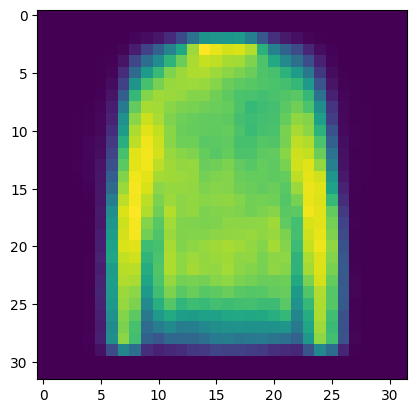

In [ ]:
plt.imshow(predictions[10])

In [ ]:
embeddings=encoder.predict(example_images)
embeddings.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


(5000, 2)

# Mapping the low dimensional latent space

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


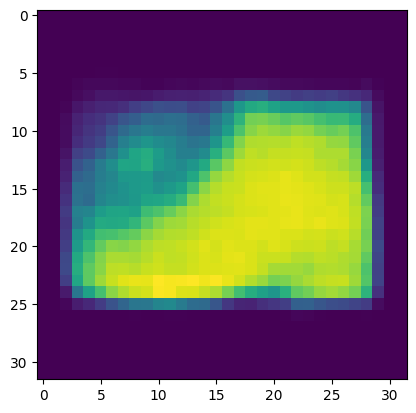

In [ ]:
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins, maxs, size=(1, 2))
reconstructions = decoder.predict(sample)
plt.imshow(reconstructions[0, :, :, :])